# Single excitation

This notebook contains an example of a circuit performing a single excitation with respect to rotation angle θ

In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit import Parameter
import numpy as np

p = np.pi/2

defining the angle of rotation θ

In [2]:
angle = Parameter('θ')

building the circuit

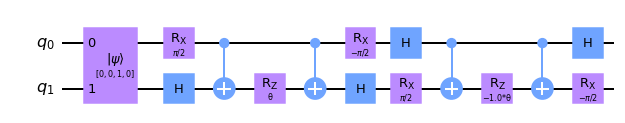

In [28]:
circuit = QuantumCircuit(2)

initial_state = [0, 0, 1, 0] # initial state, [0, 0, 1, 0] -> the first qubit is 1, the second 0
circuit.initialize(initial_state)

circuit.rx(p, 0)        # x rotation
circuit.h(1)            # hadamard gate
circuit.cx(0,1)         # cnot ladder
circuit.rz(angle, 1)    # z rotation
circuit.cx(0,1)
circuit.rx(-p, 0)
circuit.h(1)

circuit.h(0)
circuit.rx(p, 1)
circuit.cx(0,1)
circuit.rz(-angle, 1)
circuit.cx(0,1)
circuit.h(0)
circuit.rx(-p, 1)

circuit.draw(output=("mpl"))

simulating the circuit

In [33]:
rotation = 30

backend = Aer.get_backend('statevector_simulator')
result = execute(circuit.bind_parameters({angle: rotation}), backend).result()
statevector = result.get_statevector()
counts = result.get_counts()

the statevector contains the probabilities for all states

In [34]:
statevector

Statevector([-7.85046229e-17-1.66533454e-16j,
             -9.88031624e-01+1.71728863e-16j,
              1.54251450e-01+7.85046229e-17j,
              1.47196168e-17+1.66533454e-16j],
            dims=(2, 2))


the counts hold the possibilities for each non-zero state

In [35]:
counts

{'01': 0.976206490207578, '10': 0.023793509792422}

Checking the sum of all counts, it should be equal to the number of electrons

In [36]:
sum(val for val in counts.values())

1.0

# Defining the molecule

In [96]:
from qiskit_nature.second_q.drivers import PySCFDriver
driver = PySCFDriver(atom="H 0 0 0; li 0 0 1.0", basis="sto-3g")
mol = driver.run()

In [97]:
mol.num_spatial_orbitals

6

In [98]:
mol.num_particles

(2, 2)

In [99]:
mol.orbital_occupations

array([1., 1., 0., 0., 0., 0.])

In [100]:
mol.num_spin_orbitals

12

In [101]:
mol.hamiltonian

# Hartree-Fock initial state

importing the JW mapper

In [102]:
from qiskit_nature.second_q.mappers import JordanWignerMapper
mapper = JordanWignerMapper()

In [103]:
from qiskit_nature.second_q.circuit.library import HartreeFock

initial_state=HartreeFock( mol.num_spatial_orbitals, mol.num_particles, mapper)
print(initial_state)

      ┌───┐
 q_0: ┤ X ├
      ├───┤
 q_1: ┤ X ├
      └───┘
 q_2: ─────
           
 q_3: ─────
           
 q_4: ─────
           
 q_5: ─────
      ┌───┐
 q_6: ┤ X ├
      ├───┤
 q_7: ┤ X ├
      └───┘
 q_8: ─────
           
 q_9: ─────
           
q_10: ─────
           
q_11: ─────
           


In [66]:
# # alternative initial_point setup
# from qiskit_nature.second_q.algorithms.initial_points import HFInitialPoint
# initial_point = HFInitialPoint()
# print(initial_point)